# Sistema de recomendação de produtos com base na imagem escolhida

Sistema de recomendação que possui 4 classes, celular, relógio, carro e camiseta, contendo 9 imagens para cada, utilizando a rede ResNet.
Este algoritmo utiliza de Transfer Learning para selecionar via DeepLearning 3 produtos para cada imagem.
Desafio de código para curso Machine Learning Specialist via dio.me.

In [24]:
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet import ResNet50, preprocess_input
from sklearn.metrics.pairwise import cosine_similarity
from keras.models import Model
import matplotlib.pyplot as plt
from PIL import Image

# Caminho para as imagens
# Montar o Google Drive para acessar as imagens
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Definir o caminho para as imagens no Google Drive
data_dir = '/content/drive/MyDrive/sistema_recomendacao'

# Função para carregar e pré-processar imagens
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array)

# Listar os diretórios de categorias
categories = ['carro', 'celular', 'camiseta', 'relógio']

# Armazenar as imagens e seus respectivos caminhos
images = []
image_paths = []

for category in categories:
    category_path = os.path.join(data_dir, category)
    for img_file in os.listdir(category_path):
        img_path = os.path.join(category_path, img_file)
        img_array = load_and_preprocess_image(img_path)
        images.append(img_array)
        image_paths.append(img_path)

images = np.vstack(images)  # Agrupar todas as imagens em um único array


Mounted at /content/drive


In [25]:
# Carregar o modelo ResNet50 pré-treinado sem a última camada
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Extrair as features de todas as imagens
features = base_model.predict(images)
print(f"Features extraídas de {features.shape[0]} imagens com {features.shape[1]} dimensões.")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 13s 7s/step
Features extraídas de 36 imagens com 2048 dimensões.


Recomendações para a imagem: /content/drive/MyDrive/sistema_recomendacao/carro/9.jpg


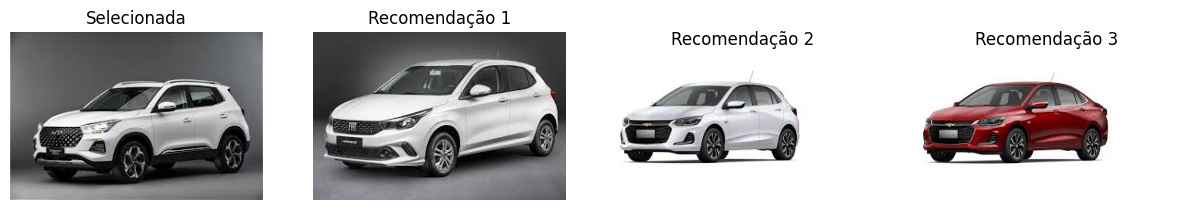

Recomendações para a imagem: /content/drive/MyDrive/sistema_recomendacao/celular/1.jpg


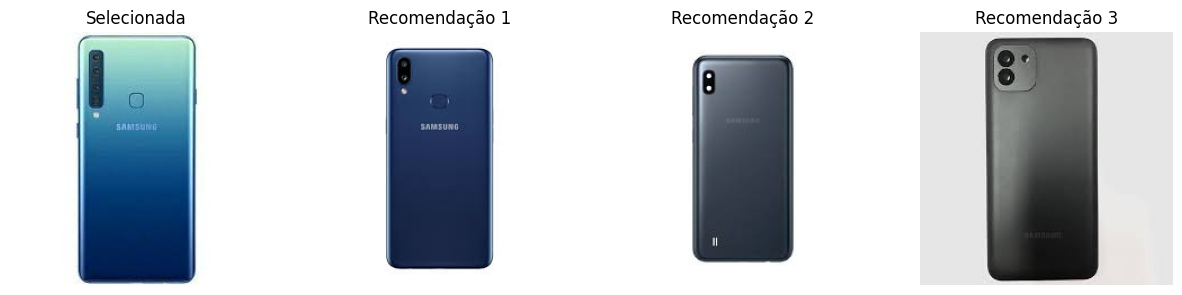

Recomendações para a imagem: /content/drive/MyDrive/sistema_recomendacao/camiseta/5.jpg


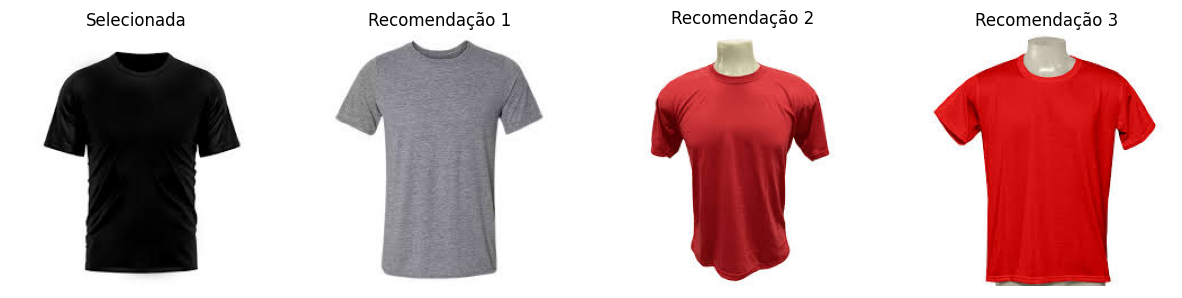

Recomendações para a imagem: /content/drive/MyDrive/sistema_recomendacao/relógio/5.jpg


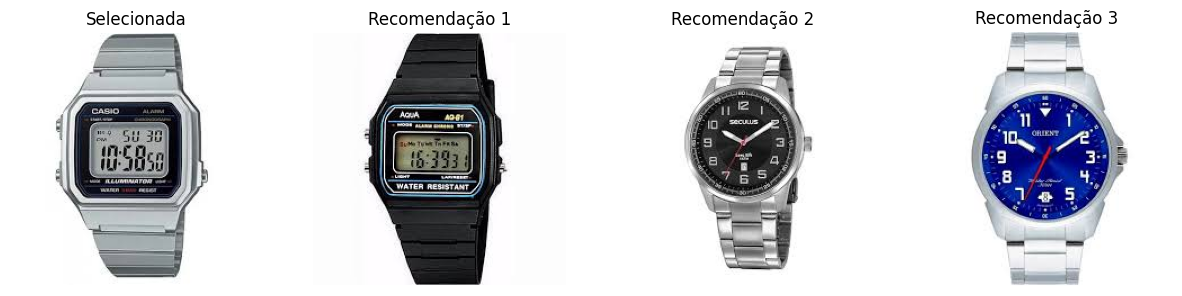

In [27]:
# Função para recomendar imagens semelhantes com base na similaridade do cosseno
def recommend_similar_images(image_index, top_n=3):
    selected_feature = features[image_index].reshape(1, -1)
    similarities = cosine_similarity(selected_feature, features).flatten()

    # Ordenar pela similaridade e pegar os índices das mais semelhantes
    similar_indices = similarities.argsort()[-top_n-1:-1][::-1]

    print(f"Recomendações para a imagem: {image_paths[image_index]}")
    plt.figure(figsize=(15, 5))

    # Mostrar a imagem selecionada
    ax = plt.subplot(1, top_n + 1, 1)
    img = Image.open(image_paths[image_index])
    plt.imshow(img)
    plt.title('Selecionada')
    plt.axis('off')

    # Mostrar as imagens recomendadas
    for i, idx in enumerate(similar_indices):
        ax = plt.subplot(1, top_n + 1, i + 2)
        img = Image.open(image_paths[idx])
        plt.imshow(img)
        plt.title(f'Recomendação {i+1}')
        plt.axis('off')

    plt.show()

# Exemplo de recomendação: recomendando para a primeira imagem (índice 0)
recommend_similar_images(0)

# Exemplo de recomendação: recomendando para a primeira imagem (índice 12)
recommend_similar_images(12)

# Exemplo de recomendação: recomendando para a primeira imagem (índice 20)
recommend_similar_images(20)

# Exemplo de recomendação: recomendando para a primeira imagem (índice 31)
recommend_similar_images(31)